# Macrogenesismodel

In [60]:
from faust_macrogen_graph import parserutils, analyzeutils, absolute_graphutils, relative_graphutils, eades_fas
from pathlib import Path
import pandas as pd
from collections import Counter, OrderedDict
import networkx as nx
import matplotlib.pyplot as plt

## 1. preparation of XML files by parsing and collecting specific elements

In [2]:
filespath = Path('resources')
temppre_items = parserutils.xmlparser(filespath)
tempsyn_items = parserutils.xmlparser(filespath, False, False)
date_items = parserutils.xmlparser(filespath, True)

In [3]:
date_items[1]

(['faust://bibliography/pravida2015'],
 ('faust://document/faustedition/1_H.5',),
 {'notBefore': '1776-01-01', 'notAfter': '1776-12-31', 'when': '-'})

## 2. relation-element graphs

### 2.1. graph for tempsyn relation-elements

In [4]:
tempsynG = nx.DiGraph()
for t in tempsyn_items:
    relative_graphutils.add_egdes_from_node_list(tempsynG, t)

### 2.2. fas graph tempsyn relation-elements

In [5]:
nx.is_directed_acyclic_graph(tempsynG)

False

In [6]:
tempsynG_fas = eades_fas.eades_FAS(tempsynG, True) 

#atempysnG = acyclic tempsyn Graph
atempsynG = tempsynG.copy()
atempsynG.remove_edges_from(tempsynG_fas)
if nx.is_directed_acyclic_graph(atempsynG) == True:
    print("The tempsyn graph is acyclic!")

The tempsyn graph is acyclic!


### 2.3. graph for temppre relation-elements 

In [7]:
temppreG = nx.DiGraph()
for t in temppre_items:
    relative_graphutils.add_egdes_from_node_list(temppreG, t)

### 2.4. fas graph for temppre relation-elements

In [8]:
nx.is_directed_acyclic_graph(temppreG)

False

In [9]:
temppreG_fas = eades_fas.eades_FAS(temppreG, True) # seven percent of the edges of tpG are in the FAS

#atemppreG = acyclic temppre Graph
atemppreG = temppreG.copy()
atemppreG.remove_edges_from(temppreG_fas)
if nx.is_directed_acyclic_graph(atemppreG) == True:
    print("The temppre graph is acyclic!")

The temppre graph is acyclic!


## 3. date-element graph 

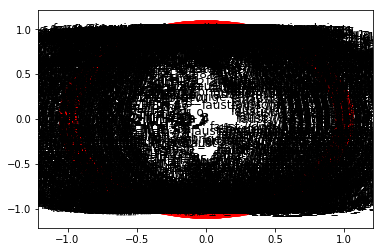

In [10]:
datesG = absolute_graphutils.graph_from_dates(date_items, "vitt")
#nx.draw_networkx(datesG)
nx.is_directed_acyclic_graph(datesG)

pos = nx.shell_layout(datesG)
nx.draw_networkx(datesG, pos)
plt.show()


In [11]:
if nx.is_directed_acyclic_graph(datesG) == True:
    print("The dates graph is acyclic!")

In [12]:
nx.write_graphml(datesG, "graphs/g9.graphml")

In [13]:
datesG_fas = eades_fas.eades_FAS(datesG, True)

#adatesG = acyclic dates graph
adatesG = datesG.copy()
adatesG.remove_edges_from(datesG_fas)
if nx.is_directed_acyclic_graph(adatesG) == True:
    print("The dates graph is acyclic!")

The dates graph is acyclic!


In [14]:
datesG_fas

{('faust://document/faustedition/2_H.15b', '1825-02-27 00:00:00', 1.0),
 ('faust://document/faustedition/2_V_H.37', '1831-02-13 00:00:00', 1.0),
 ('faust://document/faustedition/H_P106', '1827-12-16 00:00:00', 1.0),
 ('faust://document/faustedition/H_P123.1', '1826-06-10 00:00:00', 1.0),
 ('faust://document/faustedition/H_P123.2', '1826-12-15 00:00:00', 1.0),
 ('faust://document/faustedition/H_P123.5', '1826-12-17 00:00:00', 1.0),
 ('faust://document/faustedition/H_P125', '1830-02-06 00:00:00', 1.0),
 ('faust://document/faustedition/H_P149', '1829-10-17 00:00:00', 1.0),
 ('faust://document/faustedition/H_P157', '1830-06-18 00:00:00', 1.0),
 ('faust://document/faustedition/H_P166a', '1825-04-05 00:00:00', 1.0),
 ('faust://document/faustedition/H_P194', '1825-03-02 00:00:00', 1.0),
 ('faust://document/faustedition/H_P99.2', '1826-11-10 00:00:00', 1.0),
 ('faust://document/faustedition/T_5_H.1', '1815-05-17 00:00:00', 1.0),
 ('faust://inscription/faustedition/2_I_H.32/i_7_v',
  '1827-12-2

## 4. The whole graph

In [15]:
tmpG = nx.compose(temppreG, tempsynG)
G = nx.compose(tmpG, datesG)
#pos = nx.shell_layout(G)
#nx.draw_networkx(G, pos)
#plt.show()

In [16]:
nx.is_directed_acyclic_graph(G)

False

In [236]:
G_fas = eades_fas.eades_FAS(G, True)

{('1825-02-27 00:00:00', 'faust://document/faustedition/2_H.15b', 1.0),
 ('1825-02-27 00:00:00', 'faust://document/faustedition/2_V_H.21', 1.0),
 ('1825-02-27 00:00:00', 'faust://inscription/faustedition/2_V_H.24/i_r', 1.0),
 ('1825-03-02 00:00:00', 'faust://document/faustedition/H_P194', 1.0),
 ('1825-04-05 00:00:00', 'faust://document/faustedition/H_P166a', 1.0),
 ('1825-04-20 00:00:00', 'faust://document/faustedition/2_III_H.14', 1.0),
 ('1826-04-10 00:00:00',
  'faust://inscription/faustedition/2_V_H.31/i_r_o',
  1.0),
 ('1826-04-19 00:00:00', 'faust://document/faustedition/2_III_H.50d', 10.0),
 ('1826-06-10 00:00:00', 'faust://document/wa/2_III_H.III', 1.0),
 ('1826-06-13 00:00:00',
  'faust://inscription/fischer_lamberg/P170a/i_1_o',
  1.0),
 ('1826-06-24 00:00:00',
  'faust://inscription/faustedition/H_P176_Var/i_r',
  1.0),
 ('1826-11-10 00:00:00', 'faust://document/faustedition/H_P99.2', 1.0),
 ('1827-12-16 00:00:00', 'faust://document/faustedition/2_I_H.29', 1.0),
 ('1827-12-

In [18]:
aG = G.copy()
aG.remove_edges_from(G_fas)
if nx.is_directed_acyclic_graph(aG) == True:
    print("The dates graph is acyclic!")

The dates graph is acyclic!


## 5. Analyzation 

The FAS for the whole Graph contains 135 edges. The whole graph G contains 1669, so 8% of all edges are in the FAS. This percentage is too high and several attempts should be tried out to reduce the percentage.

In [19]:
print(str(int((len(G_fas) / len(G.edges())) * 100)) + "% of all edges of G are in the FAS.")

8% of all edges of G are in the FAS.


### 5.1 Rank sources by normed witness scores

We parse through the "source"-attributes of Graph edges and return a Counter with a frequency score assigned to each researcher. The idea behind this is that a researchers who contributed more than other get a much higher score. The problem is that by this method quantity surpasses quality. It is not that simple to compare two academic works by its quality and the resulting benefit for the research because the comparison possibilities are manifold and a detailed comparison would exceed this work. As simplification we adjust the scores by multiplying each score with a normalized year of the publication of the researches work about <b>Faust</b>.

<u>An example</u>: </p>
Anne Bohnenkamp released her work „… das Hauptgeschäft nicht außer Augen lassend“ 1994. Her work is used as source 355 times in the Faustedition. After the "Weimarer Ausgabe, Abt. I, Bd. 15,2, Weimar 1888 (wa_I_15_2) she is the most named source for datings. 

min_range: 1770 (Goethe began to work on his "Urfaust" 1770) </p>
max_range: 2017 (According to http://www.faustedition.net/bibliography, the youngest considered work about Faust beside the Faustedition is <b>Brüning / Hahn 2017</b>.)

Bohnenkamp 1994: 355 * ((1994 - 1770) / (2017 - 1770)) = 321.9433198380567

After the normalization Bohnenkamp surpasses the "wa_I_15_2". We simply assume in this work that datings of newer works are better and more accurately than older works. The reasoning behind this is that newer works are able to make their statements against the background of older researchs, while the older researchs are unable to do so.

TODO: MORE?

In [113]:
research_scores = analyzeutils.get_research_score(G)
sorted_research_scores = {k: research_scores[k] 
                              for k in sorted(research_scores, key=research_scores.get, reverse=True)}

norm_research_scores = analyzeutils.get_norm_research_score(G, 1770, 2020)
sorted_norm_research_scores = {k: norm_research_scores[k]
                              for k in sorted(norm_research_scores, key=norm_research_scores.get, reverse=True)}

research_df = pd.DataFrame(sorted_research_scores.items(), columns=["source", "year_frequency"])
research_df.set_index("source", inplace=True)
norm_research_df = pd.DataFrame(sorted_norm_research_scores.items(), columns=["source", "norm_year_frequency"])
norm_research_df.set_index("source", inplace=True)
ndf = research_df.join(norm_research_df)
ndf

,year_frequency,norm_year_frequency
source,,
faust://bibliography/wa_I_15_2,449,211.928
faust://bibliography/bohnenkamp1994,355,318.080
faust://bibliography/fischer-lamberg1955,346,256.040
faust://bibliography/landeck1981,141,119.004
faust://self,138,126.960
faust://bibliography/hertz1932,73,47.304
faust://bibliography/gsa-datenbank,27,19.440
faust://bibliography/inventare_2_2,26,25.064
faust://bibliography/hertz1931,10,6.440


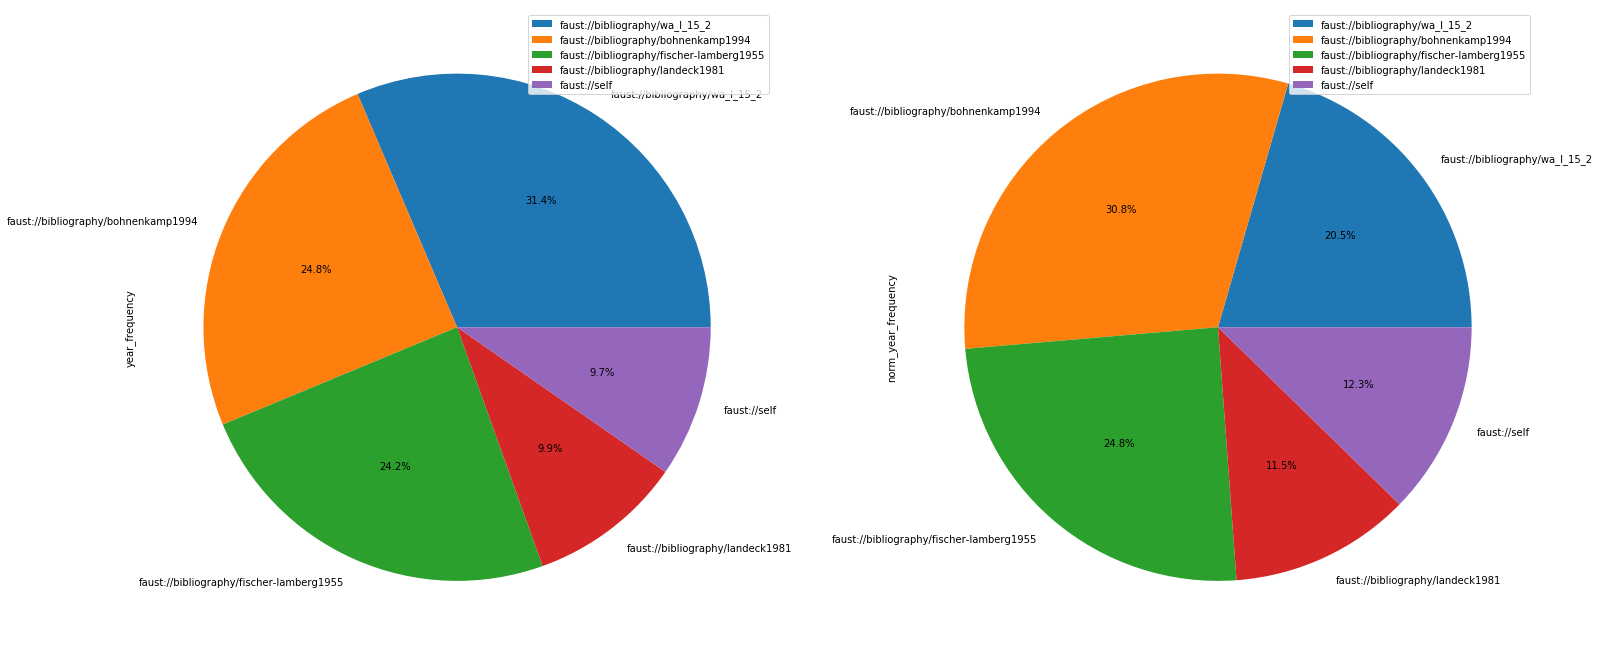

In [114]:
plot = ndf[:5].plot.pie(subplots=True, figsize=(25,25), autopct='%.1f%%')
plt.show()

### 5.2 Removing nodes and edges by critical sources

After the normalization of the source count we have a deeper look at the <b>Feedback Arc Set</b>. The FAS contains 135 edges. More than a third of the FAS is taken up by "wa_I_15_2" and more than twice as much as the second, third and fourth most common sources "fischer-lamberg1955", "bohnenkamp1994" and "landeck1981".

TODO: more!

TODO: goal making Graph acyclic by not FAS but removing entire sources (Analyse nach Quellen!!)


In [120]:
fas_source_counter = Counter()
for edge in G_fas:
    if G.has_edge(edge[0], edge[1]):
        edge_data = G.get_edge_data(edge[0], edge[1])
        key = edge_data["source"]
        if fas_source_counter[key]:
            fas_source_counter[key] += 1
        else:
            fas_source_counter[key] = 1

cdf = pd.DataFrame.from_dict(OrderedDict(fas_source_counter.most_common()), orient="index").reset_index()
cdf = cdf.rename(columns={"index":"source", 0:"fas_frequency"})
cdf.set_index("source", inplace=True)
cdf

,fas_frequency
source,
faust://bibliography/wa_I_15_2,53
faust://bibliography/fischer-lamberg1955,24
faust://bibliography/bohnenkamp1994,19
faust://bibliography/landeck1981,18
faust://bibliography/hertz1932,9
faust://bibliography/pniower1899,3
faust://self,3
faust://bibliography/bluhm1966,1
faust://bibliography/grumach1958,1


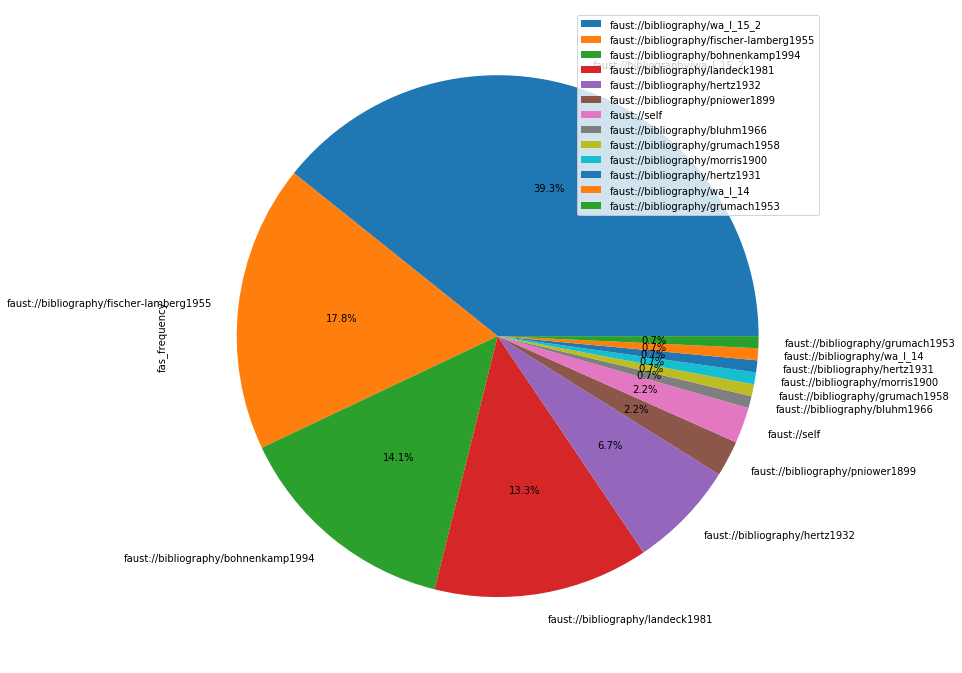

In [121]:
plot = cdf.plot.pie(y="fas_frequency", figsize=(12, 12), autopct='%.1f%%')
plt.show()

In [222]:
df = ndf.join(cdf)
df = df.dropna()
df

,year_frequency,norm_year_frequency,fas_frequency
source,,,
faust://bibliography/wa_I_15_2,449,211.928,53.0
faust://bibliography/bohnenkamp1994,355,318.080,19.0
faust://bibliography/fischer-lamberg1955,346,256.040,24.0
faust://bibliography/landeck1981,141,119.004,18.0
faust://self,138,126.960,3.0
faust://bibliography/hertz1932,73,47.304,9.0
faust://bibliography/hertz1931,10,6.440,1.0
faust://bibliography/wa_I_14,10,4.680,1.0
faust://bibliography/pniower1899,7,3.612,3.0


We now generate a Dataframe where the sources of the FAS edges determine the index and the 
- frequency of the researcher as manuscript source
- normed frequency of the researcher as manuscript source
- frequency of the researcher as source of an edge in the FAS
- percentage which determines how many edges of an researcher are in the FAS
- percentage which determines how many edges of an researcher (based on the normalized year frequency) are in the FAS

determine the four columns.
TODO

In [158]:
percent_fas = (df["fas_frequency"] / df["year_frequency"]) * 100
norm_percent_fas = (df["fas_frequency"] / df["norm_year_frequency"]) * 100
pcdf = pd.concat([percent_fas, norm_percent_fas], axis=1, sort=True)
#pcdf = percent_fas.to_frame()
pcdf = pcdf.rename(columns={0:"percent_fas", 1:"norm_percent_fas"})
pcdf.sort_values(by="percent_fas", ascending=False)
df = df.join(pcdf, on="source")
df
#Note: If the following Error raises, restart the code cell before this one and it should work
#ValueError: columns overlap but no suffix specified: Index(['percent_fas', 'norm_percent_fas'], dtype='object')

,year_frequency,norm_year_frequency,fas_frequency,percent_fas,norm_percent_fas
source,,,,,
faust://bibliography/wa_I_15_2,449,211.928,53.0,11.804009,25.008493
faust://bibliography/bohnenkamp1994,355,318.080,19.0,5.352113,5.973340
faust://bibliography/fischer-lamberg1955,346,256.040,24.0,6.936416,9.373535
faust://bibliography/landeck1981,141,119.004,18.0,12.765957,15.125542
faust://self,138,126.960,3.0,2.173913,2.362949
faust://bibliography/hertz1932,73,47.304,9.0,12.328767,19.025875
faust://bibliography/hertz1931,10,6.440,1.0,10.000000,15.527950
faust://bibliography/wa_I_14,10,4.680,1.0,10.000000,21.367521
faust://bibliography/pniower1899,7,3.612,3.0,42.857143,83.056478


For answering the question which complete source we want to remove to make the Graph acyclic without computing a FAS, we rely on several characteristics a source should have to be rather removed from the Graph than other sources:
1. Very old source 
2. small of amount of edges in the Graph
3. resulting from (1) and (2) a high <b>norm_percent_fas</b>-score.
4. ?

If a source meets many of the mentioned characteristics, we remove every edge with the source as attribute and compare how much the FAS shrinkes afterwards.


In [195]:
critical_sources = {}
param = 1
for k, v in dict(df["norm_percent_fas"]).items():
    if v >= param:
        critical_sources[k] = v
critical_sources = [(k, critical_sources[k]) for k in sorted(critical_sources, key=critical_sources.get, reverse=True)]        
critical_sources

[('faust://bibliography/morris1900', 96.15384615384615),
 ('faust://bibliography/pniower1899', 83.05647840531562),
 ('faust://bibliography/bluhm1966', 63.775510204081634),
 ('faust://bibliography/wa_I_15_2', 25.00849345060587),
 ('faust://bibliography/grumach1953', 22.768670309653917),
 ('faust://bibliography/grumach1958', 22.163120567375884),
 ('faust://bibliography/wa_I_14', 21.367521367521363),
 ('faust://bibliography/hertz1932', 19.025875190258752),
 ('faust://bibliography/hertz1931', 15.527950310559005),
 ('faust://bibliography/landeck1981', 15.125541998588284),
 ('faust://bibliography/fischer-lamberg1955', 9.373535385096078),
 ('faust://bibliography/bohnenkamp1994', 5.973340040241449),
 ('faust://self', 2.3629489603024574)]

In [196]:

critical_sources_fas = {}
for critical_source in critical_sources:
    F = G.copy()
    for edge in list(F.edges()):
        edge_data = F.get_edge_data(edge[0], edge[1])
        if edge_data["source"] == critical_source[0]:
            F.remove_edge(edge[0], edge[1])
    F_fas = eades_fas.eades_FAS(F, True)
    critical_sources_fas[critical_source[0]] = len(F_fas)
critical_sources_fas

{'faust://bibliography/morris1900': 134,
 'faust://bibliography/pniower1899': 131,
 'faust://bibliography/bluhm1966': 133,
 'faust://bibliography/wa_I_15_2': 56,
 'faust://bibliography/grumach1953': 134,
 'faust://bibliography/grumach1958': 134,
 'faust://bibliography/wa_I_14': 134,
 'faust://bibliography/hertz1932': 114,
 'faust://bibliography/hertz1931': 134,
 'faust://bibliography/landeck1981': 108,
 'faust://bibliography/fischer-lamberg1955': 89,
 'faust://bibliography/bohnenkamp1994': 100,
 'faust://self': 127}

In [227]:
criticals = pd.Series(critical_sources_fas)
criticals = criticals.to_frame()
ndf = df.join(criticals)
ndf.rename(columns={0:"fas_without_source"}, inplace=True)
ndf

#Note: If the following Error raises, restart the code cell with the creation of "df" and it should work
#ValueError: columns overlap but no suffix specified: Index(['percent_fas', 'norm_percent_fas'], dtype='object')

,year_frequency,norm_year_frequency,fas_frequency,fas_without_source
source,,,,
faust://bibliography/wa_I_15_2,449,211.928,53.0,56
faust://bibliography/bohnenkamp1994,355,318.080,19.0,100
faust://bibliography/fischer-lamberg1955,346,256.040,24.0,89
faust://bibliography/landeck1981,141,119.004,18.0,108
faust://self,138,126.960,3.0,127
faust://bibliography/hertz1932,73,47.304,9.0,114
faust://bibliography/hertz1931,10,6.440,1.0,134
faust://bibliography/wa_I_14,10,4.680,1.0,134
faust://bibliography/pniower1899,7,3.612,3.0,131


comparison of FAS when every source will be removed from G

In [244]:
scores = dict(analyzeutils.get_research_score(G))

critical_sources_fas = {}
for score in scores:
    F = G.copy()
    for edge in list(F.edges()):
        edge_data = F.get_edge_data(edge[0], edge[1])
        if edge_data["source"] == score:
            F.remove_edge(edge[0], edge[1])
    F_fas = eades_fas.eades_FAS(F, True)
    critical_sources_fas[score] = len(F_fas)
critical_sources_fas = [(k, critical_sources_fas[k]) for k in sorted(critical_sources_fas, key=critical_sources_fas.get, reverse=True)]
possible_critical_sources = {}
for t in critical_sources_fas:
    if t[0] not in list(ndf.index.values) and t[1] != 135:
        possible_critical_sources[t[0]] = t[1]
possible_critical_sources

[('faust://bibliography/scheibe1965', 135),
 ('faust://bibliography/graef1901-1914_II_2', 135),
 ('faust://bibliography/schillemeit1985', 135),
 ('faust://bibliography/lohmeyer1927', 135),
 ('faust://bibliography/hohlfeld1955', 135),
 ('faust://bibliography/duentzer1891b', 135),
 ('faust://bibliography/aa_duw_2', 135),
 ('faust://bibliography/kmommsen1960', 135),
 ('faust://bibliography/morris1902b', 135),
 ('faust://bibliography/duentzer1891a', 135),
 ('faust://bibliography/bruening_hahn2017', 135),
 ('faust://bibliography/witkowski1894', 135),
 ('faust://bibliography/pravida2015', 135),
 ('faust://bibliography/suphan1876', 135),
 ('faust://bibliography/krogmann1933', 135),
 ('faust://bibliography/harnack1891', 135),
 ('faust://bibliography/morris1899', 135),
 ('faust://bibliography/schillemeit1986', 135),
 ('faust://bibliography/pniower1924', 135),
 ('faust://bibliography/mmommsen1953', 135),
 ('faust://bibliography/wa_I_53', 135),
 ('faust://bibliography/frankenberger1926', 135),
 (